In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing import image

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
data_path = '/home/vego/Documents/skripsi/program/dataset/CK+48'
data_dir_list = os.listdir(data_path)
print(data_dir_list)

['disgust', 'sadness', 'happy', 'anger', 'contempt', 'fear', 'surprise']


In [3]:
aug_image = ImageDataGenerator(rescale=1./255,
                                validation_split=0.3,
                                rotation_range=20,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                zoom_range=0.2,  
                                horizontal_flip=True,
                                shear_range=0.2,
                                fill_mode='nearest')

In [4]:
size = 48
batch = 32

train_data = aug_image.flow_from_directory(data_path,
                                          #color_mode='grayscale',
                                          target_size=(size,size),
                                          batch_size=batch,
                                          class_mode='categorical',
                                          subset='training')

valid_data = aug_image.flow_from_directory(data_path,
                                          #color_mode='grayscale',
                                          target_size=(size,size),
                                          batch_size=batch,
                                          class_mode='categorical',
                                          subset='validation',
                                          shuffle=False)

test_data = aug_image.flow_from_directory(data_path,
                                         #color_mode='grayscale',
                                         target_size=(size,size),
                                         batch_size=1,
                                         shuffle=False)

Found 689 images belonging to 7 classes.
Found 292 images belonging to 7 classes.
Found 981 images belonging to 7 classes.


In [5]:
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization

In [6]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=4,activation="relu",input_shape=(48,48,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=4,activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=4,activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(7,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 45, 45, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

2022-08-29 02:25:19.462742: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-08-29 02:25:19.462793: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: vego-VivoBook-14-ASUS-Laptop-X407UB
2022-08-29 02:25:19.462807: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: vego-VivoBook-14-ASUS-Laptop-X407UB
2022-08-29 02:25:19.462926: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.85.2
2022-08-29 02:25:19.462965: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.85.2
2022-08-29 02:25:19.462976: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.85.2
2022-08-29 02:25:19.464380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the

Total params: 88,199
Trainable params: 88,199
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
# compile model dengan 'adam' optimize loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [9]:
# save_model = 'my_model.h5'

# checkpoint = ModelCheckpoint(save_model, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# callback_list=[checkpoint]

# latih model dengan model.fit
hist = model.fit(train_data,
          batch_size=batch,
          epochs=100, # tambahkan epoch jika akurasi model belum optimal
          validation_data=valid_data,
          #callbacks=callback_list,
          verbose=2)
hist

Epoch 1/100
22/22 - 7s - loss: 0.4706 - accuracy: 0.2104 - val_loss: 0.4027 - val_accuracy: 0.2534 - 7s/epoch - 296ms/step
Epoch 2/100
22/22 - 4s - loss: 0.4156 - accuracy: 0.2163 - val_loss: 0.3966 - val_accuracy: 0.2534 - 4s/epoch - 160ms/step
Epoch 3/100
22/22 - 4s - loss: 0.4140 - accuracy: 0.2046 - val_loss: 0.3939 - val_accuracy: 0.2534 - 4s/epoch - 165ms/step
Epoch 4/100
22/22 - 4s - loss: 0.4045 - accuracy: 0.2482 - val_loss: 0.3914 - val_accuracy: 0.2534 - 4s/epoch - 165ms/step
Epoch 5/100
22/22 - 4s - loss: 0.4034 - accuracy: 0.2467 - val_loss: 0.3905 - val_accuracy: 0.2534 - 4s/epoch - 165ms/step
Epoch 6/100
22/22 - 3s - loss: 0.3954 - accuracy: 0.2525 - val_loss: 0.3722 - val_accuracy: 0.3425 - 3s/epoch - 158ms/step
Epoch 7/100
22/22 - 4s - loss: 0.3688 - accuracy: 0.3425 - val_loss: 0.3405 - val_accuracy: 0.3973 - 4s/epoch - 163ms/step
Epoch 8/100
22/22 - 4s - loss: 0.3419 - accuracy: 0.4107 - val_loss: 0.3215 - val_accuracy: 0.4486 - 4s/epoch - 161ms/step
Epoch 9/100
22/2

Epoch 68/100
22/22 - 3s - loss: 0.1070 - accuracy: 0.8433 - val_loss: 0.1258 - val_accuracy: 0.8151 - 3s/epoch - 146ms/step
Epoch 69/100
22/22 - 3s - loss: 0.1126 - accuracy: 0.8244 - val_loss: 0.1298 - val_accuracy: 0.7979 - 3s/epoch - 143ms/step
Epoch 70/100
22/22 - 5s - loss: 0.1079 - accuracy: 0.8462 - val_loss: 0.1462 - val_accuracy: 0.7671 - 5s/epoch - 213ms/step
Epoch 71/100
22/22 - 3s - loss: 0.1114 - accuracy: 0.8273 - val_loss: 0.1431 - val_accuracy: 0.7774 - 3s/epoch - 134ms/step
Epoch 72/100
22/22 - 3s - loss: 0.1062 - accuracy: 0.8621 - val_loss: 0.1342 - val_accuracy: 0.7774 - 3s/epoch - 135ms/step
Epoch 73/100
22/22 - 3s - loss: 0.1026 - accuracy: 0.8621 - val_loss: 0.1236 - val_accuracy: 0.8322 - 3s/epoch - 137ms/step
Epoch 74/100
22/22 - 3s - loss: 0.1076 - accuracy: 0.8462 - val_loss: 0.1224 - val_accuracy: 0.8219 - 3s/epoch - 130ms/step
Epoch 75/100
22/22 - 3s - loss: 0.1039 - accuracy: 0.8650 - val_loss: 0.1269 - val_accuracy: 0.8425 - 3s/epoch - 130ms/step
Epoch 76

In [12]:
from keras.models import load_model
import numpy as np

In [13]:
model_path = '/home/vego/Documents/skripsi/program/my_model.h5'
model = load_model(model_path)

1/1 [==============================] - 0s 23ms/step
/home/vego/Documents/skripsi/program/dataset/uji/angry/S026_003_00000013.png
Angry


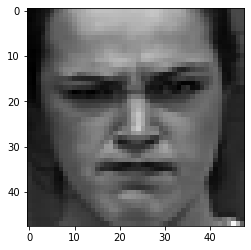

In [23]:
# menggunakan model untuk mengklasifikasikan gambar kamar

import numpy as np 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# masukkan file nama gambar 
path = '/home/vego/Documents/skripsi/program/dataset/uji/angry/S026_003_00000013.png'
img = tf.keras.preprocessing.image.load_img(path, target_size=(48,48))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = tf.image.resize(x, [48,48])
x = np.expand_dims(x, axis=0)

classes={
    0: 'Angry',
    1: 'Contempt',
    2: 'Disgust',
    3: 'Fear',
    4: 'Happy',
    5: 'Sadness',
    6: 'Surprise'
}
images = np.vstack([x])
pred = model.predict(images)

class_names = classes.values()
class_name = list(class_names)

result =class_name[np.argmax(pred)]
print(path)
print(result)

In [ ]:
import numpy as np 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()